3주차 복습 예제

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 1번

 iris데이터셋 준비

In [70]:
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset=load_iris()
X=pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
y=pd.DataFrame(iris_dataset['target'],columns=['target'])

In [71]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [72]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


y데이터의 구성을 확인하고(value_counts, unique 등 자유롭게 이용) KNeighborClassifier,KNeighborRegressor 중 사용할 모델을 import 하세요.

In [79]:
print(y['target'].unique())
from sklearn.neighbors import KNeighborsClassifier

[0 1 2]


y데이터 클래스의 비율을 유지한 채 훈련데이터와 테스트데이터를 나누세요(random_state=10) 

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=10)

n_neighbors=4로 학습시키고 X_test 데이터의 pred값, y_test 값을 각각 출력하세요
(y_test는 pred와 같은 형식으로 출력 hint) ravel(), flatten() 등

In [83]:
kn=KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train,y_train)
pred=kn.predict(X_test)
print(f'X_test pred : {pred}')
print(f'y_test : {y_test.values.ravel()}')

X_test pred : [1 1 1 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
y_test : [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


accuracy_score, kn.score로 각각 출력하세요

In [84]:
from sklearn.metrics import accuracy_score
print(f'accuracy_score : {accuracy_score(y_test,pred)}')
print(f'kn.score : {kn.score(X_test,y_test)}')

accuracy_score : 0.9736842105263158
kn.score : 0.9736842105263158


# 2번

boston 주택가격 데이터셋 준비

In [86]:
from sklearn.datasets import load_boston
boston=load_boston()
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])
y=pd.DataFrame(boston.target,columns=['price'])

In [87]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [88]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [89]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


데이터셋을 훈련 데이터, 테스트 데이터로 나누세요.(random_state=10)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [92]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors를 1~10까지 했을 떄 가장 mean_absolute_error가 가장 낮은 n_neighbors 수를 출력하고 1~10까지의 error를 시각화 하세요

n_neighbors=8 / abs_error : 5.013582677165355


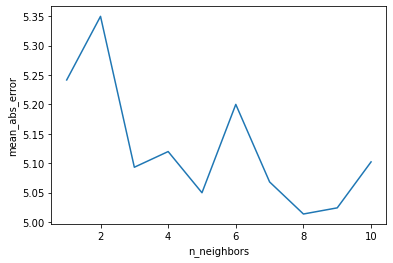

In [67]:
from sklearn.metrics import mean_absolute_error
error_list=[]
for i in range(1,11):
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    pred=knr.predict(X_test)
    error_list.append(mean_absolute_error(y_test,pred))
plt.plot(range(1,11),error_list)
plt.xlabel('n_neighbors')
plt.ylabel('mean_abs_error')
print(f'n_neighbors={np.argmin(error_list)+1} / abs_error : {min(error_list)}')